In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from parameters import sup_cap_yang
from get_data import get_weather_data 

Analisando a sensibilidade da cap suporte senoidal

In [2]:
def sup_cap_sin(t, C0, epsilon, t_omega, phi):
    
    omega = (2*np.pi)/t_omega
    
    C = C0*(1 + epsilon*np.cos(omega*t + phi))
    return C

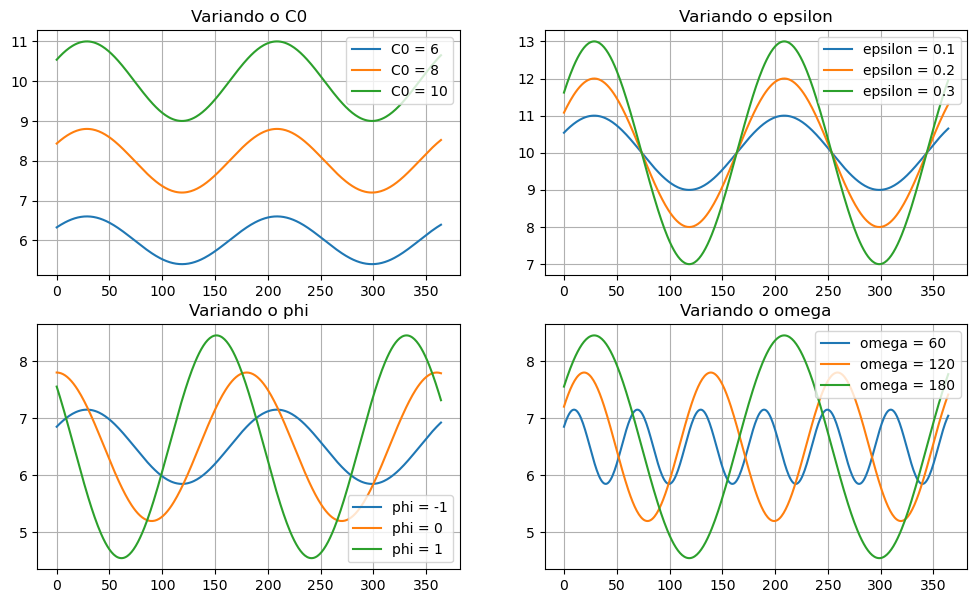

In [3]:
t = np.arange(0, 365)

fig, ax = plt.subplots(2,2, figsize = (12,7))

#variando o C0
ax[0,0].plot(t, sup_cap_sin(t, C0 = 6, epsilon = 0.1, t_omega = 180, phi = -1), label = 'C0 = 6')

ax[0,0].plot(t, sup_cap_sin(t, C0 = 8, epsilon = 0.1, t_omega = 180, phi = -1), label = 'C0 = 8')

ax[0,0].plot(t, sup_cap_sin(t, C0 = 10,  epsilon = 0.1, t_omega = 180, phi = -1), label = 'C0 = 10')

ax[0,0].grid()

ax[0,0].set_title('Variando o C0')

ax[0,0].legend()


# variando o epsilon 
ax[0,1].plot(t, sup_cap_sin(t, C0 = 10, epsilon = 0.1, t_omega = 180, phi = -1), label = 'epsilon = 0.1')

ax[0,1].plot(t, sup_cap_sin(t, C0 = 10, epsilon = 0.2, t_omega = 180, phi = -1), label = 'epsilon = 0.2')

ax[0,1].plot(t, sup_cap_sin(t, C0 = 10, epsilon = 0.3, t_omega = 180, phi = -1), label = 'epsilon = 0.3')

ax[0,1].grid()

ax[0,1].set_title('Variando o epsilon')

ax[0,1].legend()

# variando o phi 
ax[1,0].plot(t, sup_cap_sin(t, C0 = 6.5, epsilon = 0.1, t_omega = 180, phi = -1), label = 'phi = -1')

ax[1,0].plot(t, sup_cap_sin(t, C0 = 6.5, epsilon = 0.2, t_omega = 180, phi = 0.0), label = 'phi = 0')

ax[1,0].plot(t, sup_cap_sin(t, C0 = 6.5, epsilon = 0.3, t_omega = 180, phi = 1.0), label = 'phi = 1')

ax[1,0].grid()

ax[1,0].set_title('Variando o phi')

ax[1,0].legend()

# variando o omega

ax[1,1].plot(t, sup_cap_sin(t, C0 = 6.5, epsilon = 0.1, t_omega = 60, phi = -1), label = 'omega = 60')

ax[1,1].plot(t, sup_cap_sin(t, C0 = 6.5, epsilon = 0.2, t_omega = 120, phi = -1), label = 'omega = 120')

ax[1,1].plot(t, sup_cap_sin(t, C0 = 6.5, epsilon = 0.3, t_omega = 180, phi = -1), label = 'omega = 180')

ax[1,1].grid()

ax[1,1].set_title('Variando o omega')

ax[1,1].legend()

plt.show()

Analisando a sensiblidade da capacidade suporte do yang:

In [21]:
df_we = get_weather_data()

df_we = df_we.loc[(df_we.index >= '2010-01-01') & (df_we.index <= '2010-05-01')]

df_we

,daily_precipitation-mm,temp_max-celsius,temp_min-celsius,temp_mean-celsius,mean_relative_humidity-%,mean_wind_speed-m_per_s
date,,,,,,
2010-01-01,0.0,31.1,23.9,26.7,72.1,1.7
2010-01-02,2.2,32.9,23.8,27.2,75.3,1.3
2010-01-03,0.0,32.3,25.6,28.4,73.2,1.7
2010-01-04,1.6,33.9,24.6,28.5,75.5,2.5
2010-01-05,0.2,35.2,25.5,29.5,69.1,2.6
...,...,...,...,...,...,...
2010-04-27,0.0,24.0,15.7,18.1,84.1,0.6
2010-04-28,2.6,23.1,15.2,19.5,81.8,0.7
2010-04-29,8.0,26.1,16.4,20.0,78.1,0.6


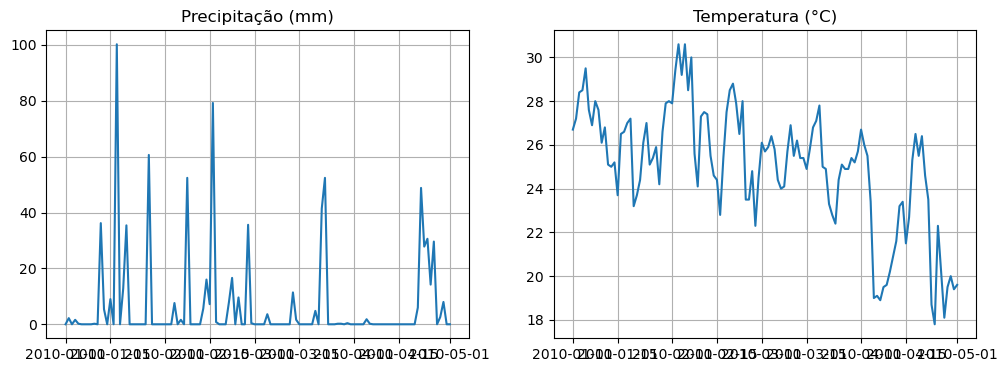

In [22]:
fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(df_we['daily_precipitation-mm'])

ax[0].set_title('Precipitação (mm)')

ax[0].grid()

ax[1].plot(df_we['temp_mean-celsius'])

ax[1].set_title('Temperatura (°C)')

ax[1].grid()

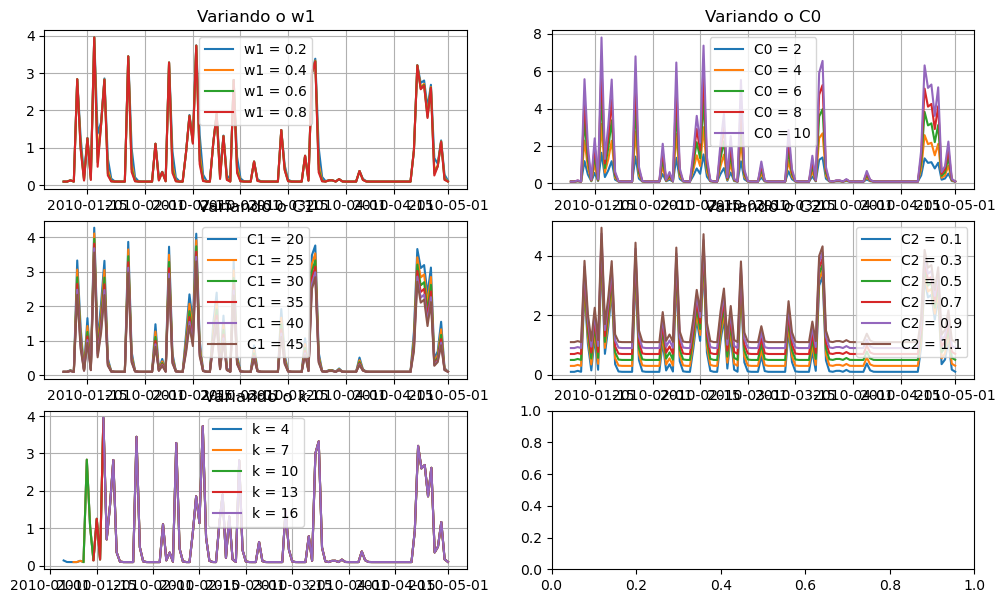

In [26]:

fig, ax = plt.subplots(3,2, figsize = (12,7))

for w1 in np.arange(0.2, 1, 0.2):
    
    ax[0,0].plot(sup_cap_yang(df_we, k=7,w1=w1, C0=5,C1=30,C2 =0.1), label = f'w1 = {round(w1,1)}')
    
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_title('Variando o w1')

for C0 in np.arange(2, 12, 2):
    
    ax[0,1].plot(sup_cap_yang(df_we, k=7,w1=0.5, C0=C0,C1=30,C2 =0.1), label = f'C0 = {round(C0,1)}')
    
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_title('Variando o C0')

for C1 in np.arange(20, 50, 5):
    
    ax[1,0].plot(sup_cap_yang(df_we, k=7,w1=0.5, C0=5,C1=C1,C2 =0.1), label = f'C1 = {round(C1,1)}')
    
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_title('Variando o C1')

for C2 in np.arange(0.1, 1.2, 0.2):
    
    ax[1,1].plot(sup_cap_yang(df_we, k=7,w1=0.5, C0=5,C1=30,C2 =C2), label = f'C2 = {round(C2,1)}')
    
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_title('Variando o C2')

for k in np.arange(4, 17, 3):
    
    ax[2,0].plot(sup_cap_yang(df_we, k=k,w1=0.5, C0=5,C1=30,C2 = 0.1), label = f'k = {round(k,1)}')
    
ax[2,0].legend()
ax[2,0].grid()
ax[2,0].set_title('Variando o k')

plt.show()

In [ ]:
fig, ax = plt.subplots()

for w1 in np.arange(0.2, 1, 0.2):
    
    ax[0,0].plot(sup_cap_yang(df_we, k=7,w1=w1, C0=5,C1=30,C2 =0.1), label = f'w1 = {round(w1,1)}')
    
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_title('Variando o w1')